<a href="https://colab.research.google.com/github/sisi195/Attention-Blitz/blob/main/Copy_of_Project_01_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing in Python

Preprocessing is a crucial part of the machine learning process. It involves preparing the data in whatever ways would make our machine learning algorithm more effective and more accurate. The key steps of data preprocessing that we will cover in this notebook are:

1. **Data Quality Assessment and Cleaning**: Handle missing values, remove duplicates, fix inconsistent formatting, correct obvious errors, and handle outliers appropriately.
2. **Scaling/Normalization**: Min-max normalization, standarization, and transformations for skewed data.
3. **Feature Selection and Engineering**: Create new features from existing ones, remove irrelevant features, decompose complex features, extract features from text/images if applicable, and combine related features.


## Set Up

Let's import our dataset and take a look at its dimensions and the first few rows. For this notebook, we'll be using the [TESLA Stock Data from 2010 to 2024](https://www.kaggle.com/datasets/simronw/tesla-stock-data-2024/data).

In [1]:
from google.colab import files
uploaded = files.upload()

Saving TESLA.zip to TESLA.zip


In [2]:
import zipfile
import os

# Replace 'TESLA.zip' with the name of your uploaded ZIP file
with zipfile.ZipFile('TESLA.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/tesla_data')

import pandas as pd
df = pd.read_csv('/content/tesla_data/TESLA.csv')
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,6/29/10,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,1,6/30/10,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2,7/1/10,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,3,7/2/10,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,4,7/6/10,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


## Dealing with Missing Data

We've already seen some methods for dealing with missing data in our Python course, but let's do a quick refresher.

When encountering missing data, we have two main options: imputation or removal. The imputation method substitutes reasonable guesses for missing data. Imputation is most useful when the percentage of missing data is low. If the percentage of missing data is too high, and we impute, the results lack natural variation, which could result in a less effective model. The other option, removing data, is best when dealing with data that is missing at random; removing the entire data point can help reduce bias. However, removing data is not the best option if there are not enough observations to result in a reliable analysis.

Let's see if there are any null values in our data set.

In [3]:
null_counts = df.isnull().sum()
print(null_counts)

Unnamed: 0    0
Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
dtype: int64


As we can see, there are no null values in the data set.

❓ Question: If there are no null values, does that mean no data is missing?

No, there are incomplete records or outliers

We can see from the data set that there are days missing since stocks don't trade on weekends and major holidays.

❓ Question: Should we impute the missing data or ignore (remove) it?

Impute the missing data

## Dealing with Outliers

Recall that an outlier is a data point that lies far away from the rest of the observations.

We can detect outliers in large datasets via the Z-Score Method, the IQR Method, or the Box-Plot Method (a visual representation of the IQR method).

Certain types of machine learning models are more negatively reactive to outliers. In some numerical predictive models, for instance, outliers can pull the model towards the extreme values, causing it to poorly capture the underly patterns in the data. However, in classification model for which there is a heavy skew in the data, data points that could be deemed outliers prove instrumental to building a useful model. For instance, if you were training a model to recognize fraudulent transactions, among hundreds of thousands of data points, maybe dozens to a couple hundred could be cases of fraud. We wouldn't want to omit these cases, even if they account for a very small percentage of the data, since they give our model vital information. Without these "outliers", the model would identify a transaction to not be fraudulent 100% of the time, which isn't very useful.

For this reason, it is generally not considered good practice to just delete outliers (trimming/removing) when preprocessing for machine learning. Here are some other ways you can deal with outliers:

1.   **Quantile-Based Flooring and Capping**: In this technique, the outlier is capped at a certain value above the 90th percentile or floored at a a factor below the 10th percentile value. The data points that are lesser than the 10th percentile are replaced with the 10th percentile value and the data points that are greater than the 90th percentile are replaced with the 90th percentile value.
2. **Mean/Median Imputation**: In this method, outliers are replaced with the mean or median value. Since the mean value can be highly influenced by the outlier treatement, it is advised to replace the outliers with the median value.
3. **Binary Flagging**: Create an additional feature that flags whether the original value was an outlier (1) or not (0). This preserves the information about outlier occurrence while allowing you to transform or cap the original value.
4. **Binning/Discretization**: Convert the continuous variable into discrete bins or categories, which can help mitigate the impact of outliers while preserving their relative magnitude.

This is not an exhaustive list. The way you deal with outliers should be specific to the type of data you're working with and the ML method you're using. As such, there are many ways to approach this problem. As meta as it may be, sometime ML engineers may employ ML algorithms to identify and deal with outliers as part of their preprocessing for model training.


Now, let's take a look at potential outliers in our stock data using the IQR method.

In [4]:
# Finds percentage of outliers + specific outliers in a given column of a DataFrame using the IQR method.
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Outliers in {column}:")
    print(outliers)

    # Return the percentage of outliers
    percent_outliers = (len(outliers) / len(data)) * 100
    print(f"\nPercentage of outliers: {percent_outliers:.2f}%")

    return outliers

print(find_outliers_iqr(df, 'Volume'))

Outliers in Volume:
      Unnamed: 0      Date        Open        High         Low       Close  \
0              0   6/29/10    1.266667    1.666667    1.169333    1.592667   
1              1   6/30/10    1.719333    2.028000    1.553333    1.588667   
720          720    5/9/13    4.674667    5.051333    4.246000    4.626667   
721          721   5/10/13    4.643333    5.400000    4.616667    5.117333   
722          722   5/13/13    5.399333    5.866667    5.276667    5.853333   
...          ...       ...         ...         ...         ...         ...   
2638        2638  12/18/20  222.966659  231.666672  209.513336  231.666672   
2689        2689    3/5/21  208.686661  209.279999  179.830002  199.316666   
3166        3166   1/26/23  159.970001  161.419998  154.759995  160.270004   
3167        3167   1/27/23  162.429993  180.679993  161.169998  177.899994   
3481        3481   4/29/24  188.419998  198.869995  184.539993  194.050003   

       Adj Close     Volume  
0       1.592

✅ Try it yourself: Call the find_outliers_iqr function with each of the columns in our DataFrame.

In [5]:
columns = df.select_dtypes(include=['number']).columns

for column in columns:
    print(f"Outliers in {column}:")
    print(find_outliers_iqr(df, column))
    print("\n")

Outliers in Unnamed: 0:
Outliers in Unnamed: 0:
Empty DataFrame
Columns: [Unnamed: 0, Date, Open, High, Low, Close, Adj Close, Volume]
Index: []

Percentage of outliers: 0.00%
Empty DataFrame
Columns: [Unnamed: 0, Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


Outliers in Open:
Outliers in Open:
Empty DataFrame
Columns: [Unnamed: 0, Date, Open, High, Low, Close, Adj Close, Volume]
Index: []

Percentage of outliers: 0.00%
Empty DataFrame
Columns: [Unnamed: 0, Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


Outliers in High:
Outliers in High:
Empty DataFrame
Columns: [Unnamed: 0, Date, Open, High, Low, Close, Adj Close, Volume]
Index: []

Percentage of outliers: 0.00%
Empty DataFrame
Columns: [Unnamed: 0, Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


Outliers in Low:
Outliers in Low:
Empty DataFrame
Columns: [Unnamed: 0, Date, Open, High, Low, Close, Adj Close, Volume]
Index: []

Percentage of outliers: 0.00%
Empty DataFrame
Columns: [Unnamed: 0,

❓ Question: Which column has the highest percentage of outliers? Why might that be?

The Volume column, because the volumn is the buy or sell a share within a period of time.

## Data Normalization

Normalization is a process that transforms your data's features to a standard scale, typically between 0 and 1 or -1 to 1. This is achieved by adjusting each feature's values based on its minimum and maximum values. The goal is to ensure that no single feature dominates the others due to its magnitude. The range of all features can be normalized so that each feature contributes approximately proportionately to the final prediction.

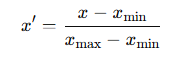

In our TESLA stock dataset, the columns "High", "Low", etc. contain values that are roughly around the same range as each other, from near 1 to around 400. Volume, on the other hand, contains values on a completely different scale, ranging from 1,777,500 to 914,082,000. If we were using a ML method that relies on calculating the distances between points (for instance, k-Nearest Neighbors, which we'll discuss in our Supervised Learning Module), the Volume feature would overpower the others.





In [6]:
df.describe()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
count,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3.637000e+03
mean,1818.000000,80.080574,81.832710,78.219276,80.067952,80.067952,9.667330e+07
std,1050.055792,105.466131,107.807170,102.931208,105.409448,105.409448,7.787314e+07
min,0.000000,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,909.000000,12.046667,12.320000,11.746667,12.065333,12.065333,4.868250e+07
50%,1818.000000,17.833332,18.080000,17.563999,17.846666,17.846666,8.198100e+07
75%,2727.000000,176.070007,179.770004,173.169998,176.880005,176.880005,1.223940e+08
max,3636.000000,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


One important thing to note is that min-max standardization does not work well when the data contains outliers, since a single extreme value can significantly distort the entire scale, effectively squishing the majority of data points into a small range between 0 and 1.

We'll now create a new DataFrame that is min-max standardized for each of our features, but since our 'Volume' column contains 5% outliers, we need to deal with these outliers first.

Let's create an additional column in our DataFrame called, "High Volume", then create a new min-max normalized DataFrame excluding those values.

In [7]:
# Get outlier rows using existing find_outliers_iqr function
outliers = find_outliers_iqr(df, 'Volume')

# Create High Volume flag column
df['High Volume'] = False
df.loc[outliers.index, 'High Volume'] = True

# Create normalized version excluding outliers from min/max calculation
df_normalized = df.copy()
normal_volumes = df[df['High Volume'] == False]['Volume']
min_val = normal_volumes.min()
max_val = normal_volumes.max()

# Apply normalization to all data using non-outlier min/max
df_normalized['Volume_Normalized'] = (df['Volume'] - min_val) / (max_val - min_val)

# Print some statistics to verify
print("\nVerification stats:")
print("Number of high volume days:", df['High Volume'].sum())
print("Percentage of high volume days: {:.2f}%".format(df['High Volume'].mean() * 100))

# Show head of results
print("\nSample of normalized data:")
print(df_normalized.head())

Outliers in Volume:
      Unnamed: 0      Date        Open        High         Low       Close  \
0              0   6/29/10    1.266667    1.666667    1.169333    1.592667   
1              1   6/30/10    1.719333    2.028000    1.553333    1.588667   
720          720    5/9/13    4.674667    5.051333    4.246000    4.626667   
721          721   5/10/13    4.643333    5.400000    4.616667    5.117333   
722          722   5/13/13    5.399333    5.866667    5.276667    5.853333   
...          ...       ...         ...         ...         ...         ...   
2638        2638  12/18/20  222.966659  231.666672  209.513336  231.666672   
2689        2689    3/5/21  208.686661  209.279999  179.830002  199.316666   
3166        3166   1/26/23  159.970001  161.419998  154.759995  160.270004   
3167        3167   1/27/23  162.429993  180.679993  161.169998  177.899994   
3481        3481   4/29/24  188.419998  198.869995  184.539993  194.050003   

       Adj Close     Volume  
0       1.592

## Data Standardization

Standardization is similar to normalization in that we're transforming data, but in the case of standardization, our goal is to scale so that data has a mean of 0 and a standard deviation or variance of 1. We do so using the z-score standardization:


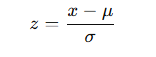

From `sklearn.preprocessing`, we can import the function `StandardScalar` to standardize a feature. Here's some information on the parameters of `StandardScaler`:
1. `copy` (default: True) Determines whether to perform the operation on a copy of the data or to modify the input data in place.
  
  When True: The scaler creates and works on a copy of the input data, leaving the original data unaltered.

  When False: The scaler modifies the original data in place, which can save memory but changes the input data.
  
  Use case: Set to False if you are working with large datasets and want to save memory.

2. `with_mean` (default: True) Indicates whether to center the data by subtracting the mean of each feature during scaling.

  When True: Centers the data by subtracting the mean of each feature.
  
  When False: Skips centering, which can be useful if the data is sparse or you want to preserve sparsity.

  Use case: Set to False for sparse matrices, as centering can destroy sparsity.

3. `with_std` (default: True) Indicates whether to scale the data to unit variance (i.e., dividing by the standard deviation).
  
  When True: Divides each feature by its standard deviation.
  
  When False: Skips scaling to unit variance.
  
  Use case: Set to False if you only need to center the data without scaling.

4. `dtype` (default: numpy.float64) Specifies the desired data type for the output array. Default is numpy.float64 for high precision.
  
  Custom Option: You can specify a lower precision type like numpy.float32 if you need to save memory.

  Use case: Use a lower precision (float32) for large datasets or when working in memory-constrained environments.



You can use standardization when the data is approximately normally distributed. Note that `StandardScaler` is sensitive to outliers, and the features may scale differently from each other in the presence of outliers. To see some visualizations of how `StandardScaler` compares with other types of scalers, take a look at [these visualizations](https://scikit-learn.org/1.5/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-standard-scaler-section).

Now, let's take a look at `StandardScaler` in practice.

In [8]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Create a copy of df with just the numeric columns we waant to scale
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df_scaled = df[numeric_cols].copy()

# Fit and transform the data
scaled_values = scaler.fit_transform(df_scaled)

# Convert back to DataFrame with same index and column names
df_scaled = pd.DataFrame(scaled_values, index=df.index, columns=numeric_cols)

# Compare original vs scaled data
print("Original Data First 5 Rows:")
print(df[numeric_cols].head())
print("\nScaled Data First 5 Rows:")
print(df_scaled.head())

# Show the mean and standard deviation of original vs scaled
print("\nOriginal Data Statistics:")
print(df[numeric_cols].describe().loc[['mean', 'std']])
print("\nScaled Data Statistics:")
print(df_scaled.describe().loc[['mean', 'std']])

Original Data First 5 Rows:
       Open      High       Low     Close  Adj Close     Volume
0  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4  1.333333  1.333333  1.055333  1.074000   1.074000  103003500

Scaled Data First 5 Rows:
       Open      High       Low     Close  Adj Close    Volume
0 -0.747394 -0.743708 -0.748661 -0.744583  -0.744583  2.373689
1 -0.743101 -0.740356 -0.744929 -0.744621  -0.744621  2.069460
2 -0.743601 -0.743139 -0.746892 -0.745804  -0.745804  0.341740
3 -0.744865 -0.744883 -0.747903 -0.747550  -0.747550 -0.251422
4 -0.746762 -0.746800 -0.749768 -0.749504  -0.749504  0.081300

Original Data Statistics:
            Open       High         Low       Close   Adj Close        Volume
mean   80.080574   81.83271   78.219276   80.067952   80.067952  9.667330e+07


❓ Question: Did we successfully scale the data to have a mean of 0 and a standard deviation of 1?

No

❓ Question: What's the difference between normalization and standardization?

normalization is when you use the min and max to bring all the data points within the same range.
standardization is when youre transforming the data using the z-score with the goal of having the mean = 0 and the standard deviation = 1

## Feature Engineering

**Feature engineering** is the process of selecting, manipulating, and otherwise transforming raw data into features to be used in machine learning. A **feature** is a measurable input that can be used in a predictive model. By converting raw observations into desired features, we can make our machine learning models more effective. Common feature engineering techniques include:

- Creating Interaction Terms: Combining two or more features to capture their combined effect. For example, multiplying two features like Price and Quantity might give insights into revenue. Interaction terms can help models understand relationships that are not directly captured by individual features.

- Scaling: Adjusting the range of numeric features to a standard scale, such as normalizing data between 0 and 1 or standardizing it to have a mean of 0 and a standard deviation of 1. This is especially important for algorithms sensitive to feature magnitude, like Support Vector Machines or k-Nearest Neighbors.

- Binning: Dividing a continuous variable into discrete intervals or "bins." For instance, ages could be grouped into bins like "0-18," "19-35," and so on. Binning helps in simplifying the data and can make patterns more apparent.

- Applying Domain Knowledge to Derive New Features: Using insights from the specific context of the data to create features. For example, in stock market data, creating a feature that measures the percentage change in stock price over a day could provide meaningful information for predicting trends.

In this example, with our TESLA dataset, let's create a new feature to capture the stock's performance within a day:

- Price Change: The absolute difference between the opening and closing price of the stock.
- Price Direction: A categorical feature indicating whether the stock price went Up or Down from the opening to the closing price.

For this example of feature engineering, let's create these features in our original DataFrame, df.

In [9]:
# Create 'Price Change' as the difference between Open and Close prices
df['Price Change'] = df['Close'] - df['Open']

✅ Try it yourself: Create 'Price Direction' column to indicate where the stock price went 'Up' or 'Down' from the opening to the closing price.

In [14]:
import numpy as np

# Create 'Price Change' as the difference between Open and Close prices
df['Price Change'] = df['Close'] - df['Open']

# Create 'Price Direction' column to indicate where the stock price went 'Up' or 'Down' from the opening to the closing price.
df['Price Direction'] = np.where(df['Close'] > df['Open'], 'Up', 'Down')

print(df[['Open', 'Close', 'Price Change', 'Price Direction']].head())

       Open     Close  Price Change Price Direction
0  1.266667  1.592667      0.326000              Up
1  1.719333  1.588667     -0.130666            Down
2  1.666667  1.464000     -0.202667            Down
3  1.533333  1.280000     -0.253333            Down
4  1.333333  1.074000     -0.259333            Down


## Feature Selection

There is a science to feature selection. ML engineers can even calculate **feature importance**, a technique used to evaluate the "importance" of each feature going into a predictive model.

By reducing the number of input variables, feature selection helps improve model performance, reduces overfitting, and decreases computational complexity. Proper feature selection ensures that the model focuses on the most informative features, leading to better accuracy and generalization.

To show a simple example of how we can decide what features to utilize, let's analyze the correlation among numeric features (Open, High, Low, Close, Adj Close, Volume) to identify redundancy. Features with high mutual correlation (e.g., Close and Adj Close) may be eliminated or transformed.

✅ Try it yourself: Calculate a correlation matrix for the numeric features and use Seaborn to create a heatmap.

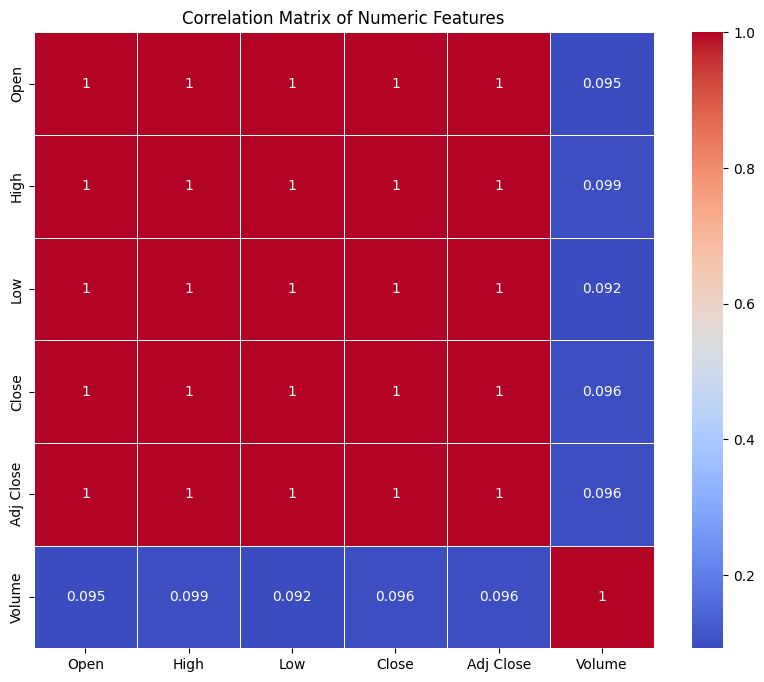

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

❓ Question: Could we safely drop any features based on this correlation analysis?

Dropping adj close because its not needed for this correlation analysis and gives excess data

## Conclusion

In summary, the preprocessing steps you take can often have large effects on the conclusions drawn from the downstream analysis. Often, data preprocessing is the most important phase of a machine learning project. If there is a high proportion of irrelevant or redundant information, noise in the dataset, or unreliable data points, knowledge discovery during our training process can prove to be more difficult. Examples of methods used in preprocessing include:

- Data Cleaning
- Data Normalization and Standardization
- One-Hot Encoding
- Feature Extraction
- Feature Selection

These preprocessing steps ensure that the dataset is clean, informative, and ready for use in predictive modeling or further analysis. By carefully selecting and engineering features, we can build more accurate and efficient models tailored to our ML task.

### 📑 Sources and Further Reading

1. [Feature Engineering Explained](https://builtin.com/articles/feature-engineering#:~:text=Apr%2029%2C%202024-,Feature%20engineering%20is%20the%20process%20of%20selecting%2C%20manipulating%20and%20transforming,used%20in%20a%20predictive%20model.), Harshil Patel | BuiltIn
2. [How to Handle Outliers](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/), Harika | Analytics Vidhya
3. [Data Preprocessing Compendium](https://dataprocessing.aixcape.org/)